# Machine Learning Engineer Nanodegree
## Capstone Project : Recommendation Engine using Factorization
Kanja Saha  
January 15, 2018

## I. Definition

### Project Proposal
https://review.udacity.com/#!/reviews/955180

### Capstone Project Notebook
All the numbers that have been presented in this project are based on the code in this [notebook](Capstone%20Project.ipynb).

### Project Overview
_Build a Product Recommendation Engine with item to item Collaborative Filtering technique using Matrix Factorization_

Some say customer is God and others say customer is King. Some say, "Listen to your customer!" while others say "Know thy customer!". The latter is my personal marketing philosophy!

A company exists because of its customers; to be precise, its loyal customers. 
A loyal customer is a satisfied customer whose trust you have earned. And the word "trust" carries a lot of weight and is only earned through consistent positive value of product, service and experience and show that you "know your customer" . To reflect that you indeed know your customer, it is imperative that you recommend only the products that you believe will benefit the customer. 

Hence a product recommendation engine is crucial for every company’s success. In fact it is necessary for success of every department of the company. A recommender system is already in place for large market place such as Amazon, Google and other organizations, small or large, are inspired to build a near accurate recommender system. As I got introduced to Nearest Neighor Algorithm in Unsupervised Learning in Udacity’s Machine Learning Nanodegree Program, I realized that clustering is at the base of Recommender System. I then researched further to find Collaborative Filtering technique implementing Matrix Factorization to be one of the popular methods to build an efficient recommender engine. 

In the more general sense, collaborative filtering is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources, etc. In terms of recommendation system, it is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating) and finding similarities between items based on user feedback. In the mathematical discipline of linear algebra, a matrix decomposition or matrix factorization is a dimensionality reduction technique that factorizes a matrix into a product of matrices, usually two. 

In building Recconmendation System using item to item Collaborative Filtering technique, we generate two matrices through convergence: an user matrix with latent features of the users  and an item matrix with a few latent features of the Items. We then take the item similarity matrix and assign rating to users based on previous ratings of the user on similar items.

I will use Amazon Product Ratings Only  Dataset for this project.
These datasets include no metadata or reviews, but only (user,item,rating,timestamp) tuples. I will use reviewerID(user), asin(item) and overall(rating) columns for my project.

Following are the details on the dataset.

- reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
- asin - ID of the product, e.g. 0000013714
- overall: rating of the product,
- reviewTime - time of the review (raw)

Sample Ratings Only Data:
{
  "reviewerID": "A2SUAM1J3GNN3B",
  "asin": "0000013714",
  "overall": 5.0,
  "reviewTime": "09 13, 2009"
}

Source for the data: http://jmcauley.ucsd.edu/data/amazon/links.html


Reference:

https://www.quora.com/What-is-a-laymans-explanation-of-matrix-factorization-in-collaborative-filtering
http://vcp.med.harvard.edu/papers/matrices-3.pdf
http://mahout.apache.org/users/recommender/matrix-factorization.html

### Problem Statement

With the advent of internet commerce, it has become convenient for the users to find the items of their interest without stepping out of their house. However with the consistent  increase of number of online retailers it is also very difficult for the user to find the items that really meets their need the best. Users feel lost in the sea of products available to them and often fear of making a wrong purchasing decision. And once they make a purchase that is not ideal, customers shy away from making further online purchase investment or recommending others. This is a no win situation for the user as well as the company selling the product

Recommendation system is considered a semi supervised learning or a combination of supervised(ranking a recommended item) and unsupervised learning(forming clusters of similar groups of customers/items). But overall it is an information retrieval system, which is another large area of machine learning.

To make a buyer feel confident about making frequent purchase decision, there is a need for a system which learns the user preferences, spending pattern and generate recommendations based on his interest and past buying habit, The Recommender System. I believe, one of the best ways to build the recommendation engine is by using Collaborative Filtering technique. Collaborative filtering is the technique of recommending items to users based on past interactions between users and items. 

So, my goal is to build a recommendation system with item to item Collaborative Filtering Technique. I will implement the Matrix Factorization algorithms in sklearn Library: Non-Negative Matrix Factorization.


### Metrics

I will use Root Mean Square Error (RMSE) as evaluation metrics.

Root mean squared error (RMSE): RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.

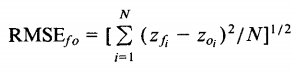

where n is the total number of observations, and Z(fi) and Z(oi) are forcasted and observed values of an observation i.

Reference:

http://www.statisticshowto.com/rmse/
https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d


## II. Analysis


### Data Exploration

Amazon ratings source dataset has around 82.5 million rows and 4 columns. The first three columns, reviewerID, asin and overall are required for this project. The dataset has 21,176,522 unique reviewers and 9,874,211 items. <br>

Due to limitation of my personal computer performance, only a subset of the dataset has been used for this project. The final dataset has 125K rows and 3 columns. It consist of a set of 23K unique reviewers with more than 5 reviews and 1.1K items that are rated by atleast 250 reviewers.<br>
This filtered dataset does not have any null values.

Here are a few rows from the final dataset.


| Index | reviewerID	    |   asin	|overall
|-------|:------------------|:----------|-------
|370	| A2S166WSCFIFP5	|000100039X	|5.0<br>
|374	| A2XQ5LZHTD4AFT	|000100039X	|5.0<br>
|382	| A29TRDMK51GKZR	|000100039X	|5.0<br>
|409	| A27ZH1AQORJ1L	    |000100039X	|5.0<br>
|418	| A3L6UC8985ORUY	|000100039X	|5.0<br>



### Exploratory Visualization

The count of items for each ratings in the dataset is obtained and the graph is plotted as shown below in Figure 1. From the graph it is obvious that users have mostly rated items as 4 or 5, which is a good news because this implies there is high potential for product recommendation of similar items.
About 50% of all ratings are 5, 20% of all ratings are 4.


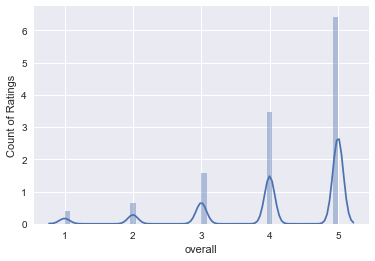

### Algorithms and Techniques

The technique that is used to generate the recommendation is called Collaborative Filtering.<br>
In the more general sense, collaborative filtering is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources, etc<br>
 
In building recommdation system using Collaborative filtering, there are two options:
- User-based Collaborative Filtering<br>
Look for users who share the same rating patterns with the active user (the user whom the prediction is for).<br>
Use the ratings from those like-minded users found in step 1 to calculate a prediction for the active user.<br><br>

- Item-based Collaborative Filtering<br>
Build an item-item matrix determining relationships between pairs of items<br>
Infer the tastes of the current user by examining the matrix and matching that user's data<br>

Since our item set is much smaller than user set, I have chosen to implement item-item Collaborative Filtering using NMF.
I will use Non-Negative Matrix Factorization (NMF) model which is implemented in sklearn library in Python.<br> 

Non-negative matrix factorization (NMF or NNMF), also non-negative matrix approximation[1][2] is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements. <br>
Below is an illustration of approximate non-negative matrix factorization: the matrix V is represented by the two smaller matrices W and H, which, when multiplied, approximately reconstruct V.

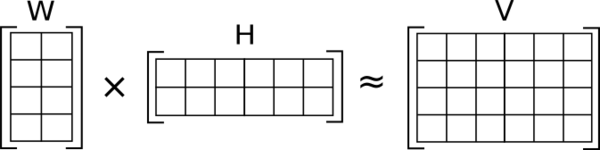

Non-Negative Matrix Factorization (NMF) is a recent technique for linear dimensionality reduction and data analysis that yields a parts based, sparse non-negative representation for non-negative input data. Essentialy, NMF is an unsupervised learning algorithm coming from linear algebra that not only reduces data dimensionality, but also performs clustering simultaneously.<br>

70% of the items in this dataset has received rating from .05% of total reviewers, this can be considered a sparse matrix. NMF tend to perform better than SVD and other matrix factorization alogorithms for sparse matrix. Although NMF is considered simplistic compared to other factorization algorithms, results in NMF are easier to interpret<br>

NMF finds two non-negative matrices (W, H) whose product approximates the original non- negative matrix X.<br>

Below is a graphical model of NMF factorization method.V visible units (V) are connected to hidden units (H) through weights W, so that V is generated from a probability distribution with mean

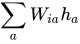

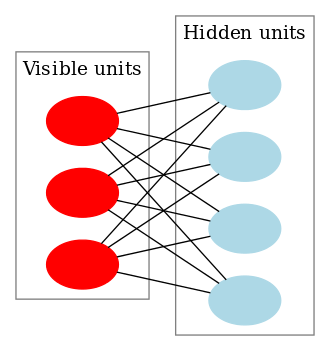

NMF has quite a few parameters but the most deciding factor is n_components, an integer or none.
n_components is the total number of latest features of the factored Matrices. The optimum value for n_components  can be generated by implementing NMF model in iterative fashion with different n_components and generate the RMSE value for each value of n_components in NMF. The n_components(latent features) with least RMSE score will be used to find the RMSE score in test dataset.

The parameters and attribute of NMF in sklearn are noted as below:
class sklearn.decomposition.NMF(n_components=None, init=None, solver='cd', beta_loss='frobenius', tol=0.0001, max_iter=200, random_state=None, alpha=0.0, l1_ratio=0.0, verbose=0, shuffle=False)

The details of this class and its default parameters can be found in sklearn documentation.<br>
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html<br>



Reference:
https://en.wikipedia.org/wiki/Non-negative_matrix_factorization


### Benchmark

I will use nearest neighors algorithm in sklearn library to generate the benchmark numbers.

The optimum value of n_neighbors in K neighors alogorithm is empirically chosen based on the sqrt of number of components, which is 32. We also generated RMSE values  based on train_data set for various K values and is plotted in the graph below. It seems from the plot that RMSE is optimum for value of K as 7, but from my experience of the dataset, it feels that number value of K will cause over fitting. I then decided to chose 32 as the final K value.

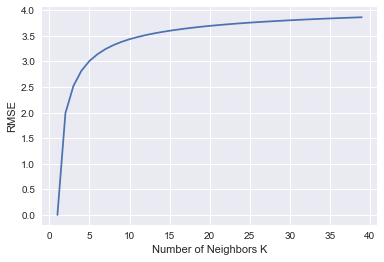

The benchmark score for RMSE is 3.87 with 32 neighors and are generated by implementing nearest neighors algorithm in test dataset in the Methodology/Implementation Section.

##### III. Methodology


### Data Preprocessing
The final dataset is pivoted to create a sparse dataframe with "reviewerID" as Index, "asin" as Column and "overall" as value. <br>This final dataframe has n rows(reviewers) and n columns(items).

In case of recommendation engine, the learning is primarily the relationship between the items. As new users are added to the matric, the item-item relationship matrix is re-used to predict the item ratings for the new user. The dataframe is split into train and test dataset as in most scenarios.(i.e. 20% for testing). 

We will run the algorithms on training dataset iteratively to find the optimum k value for k neighors algorithm and optimum p latent features for Non Negative Matrix Factorization based on their RMSE scores keeping in mind that very low RMSE score may lead to overfitting. After running the model on training dataset and finding the optimum number of neighors and latent features, we run the model again on  training dataset and store the item-item relationship matrix.

The optimum item-item relationship matrix is then used to predict ratings of test dataset. The RMSE score from kneighors on the test dataset is considered as baseline and will be used as benchmark to compare the RMSE score on test dataset with NMF algorithm.

Here is a sample of the dataset from the original matrix that will be factorized.

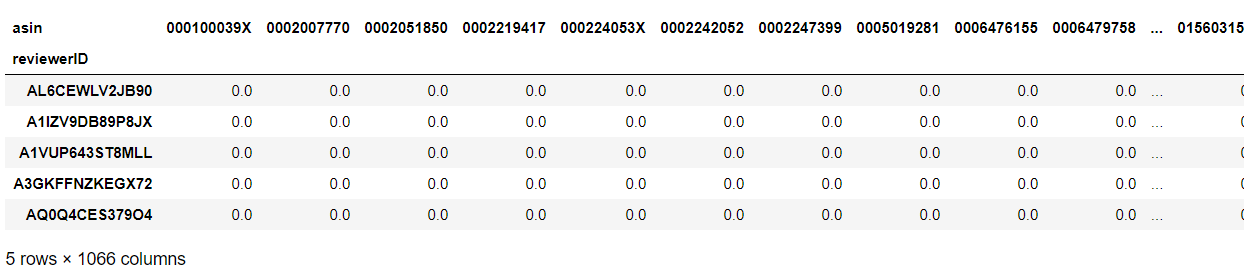



### Implementation

I have implemented the NMF algorithm from sklearn library.
Once the NMF model object is instantiated, using the fitm method, the train_data is fitted

That fitted model is then passed on to the function, which transforms the train_data according to the fitted NMF model. This returns matrix W, which in sklearn represents the samples direction and in our dataset implies users in latent space.

The fitted model also generates H matrix (model.components). H is a representation of the features. For our dataset, H is representation of Items. The dot product of W and H returns the original non negative matrix.

This H matrix is the item-item relationship matrix that will be used to predict ratings for new users. 

We generated RMSE values  based on train_data set for various P values and is plotted in the graph below. The graph does not really give any indcation to chose the best value for number of latent features.

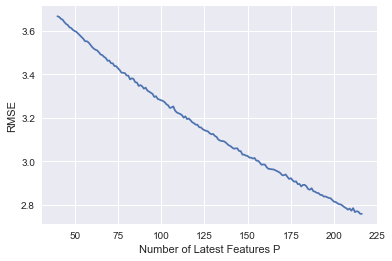

SO, I decided to choose the latent features  based on what can be an acceptable RMSE value. This is open to discussion on what other options I can look into to find the optimum number of latent features. The final p latent features I chose 200. 


Once decided on the optimum latest feature, the fitted model is be used to transform W(t) for the test data_set.
The dot product of W(T) and H will give us the ratings prediction for the test dataset.




In [ ]:
#NMF

def join_groundtruth_predicted_value_NF(nmf,v_raw_data,v_data,v_i):
    
    W = nmf.transform(v_data);
    H = nmf.components_
    item_prediction_NF = np.dot(W,H)

    item_prediction_NF=pd.DataFrame(item_prediction_NF, columns=v_data.columns,index=v_data.index)
    
    item_prediction_NF['reviewerID']=item_prediction_NF.index
    prediction_melt=pd.melt(item_prediction_NF, id_vars=['reviewerID'], var_name='asin', value_name='overall_pred')
     
    final=pd.merge(v_raw_data, prediction_melt, how='inner', on=['reviewerID','asin'])
    return final

latent_features=range(40,250)
RMSE_nf_score = []

for i in latent_features:
    
    nmf = NMF(n_components =i)
    W = nmf.fit(train_data);
    final=join_groundtruth_predicted_value_NF(nmf,raw_data,train_data,i)
    rmse_nf = sqrt(mean_squared_error(final.overall_pred, final.overall))
    RMSE_nf_score.append(rmse_nf)
    print ('Item-based CF RMSE: ' + str(rmse_nf) + ' for ' + str(i) + ' latent features')
    
latent_features_list=(list(latent_features))
plt.plot(latent_features_list, RMSE_nf_score)
plt.xlabel('Number of Latest Features P')
plt.ylabel('RMSE')
plt.show()

### Refinement

I initially chose the k neighors based on the square root of the total number of samples. I then decided to iterate over 20 values around k to find the minimum RMSE scores. The K respect to the minimum RMSE value is then choses as the final K neighors.

In case of NMF, I started with 50 latent features and then iterated over 20 p values with a gap of 25 and find the optimum RMSE scores. The K respect to the optimum RMSE value is then chosen as the latent factor p.


## IV. Results


### Model Evaluation and Validation

The k neighors and p latent factors are obtained from the training dataset.

We then use the optimized parameters and implement the models with test dataset.

The RMSE score for KNN in the test dataset with 32 neighors is 3.877246564842732.
The RMSE score for NMF in the test dataset with 300 latent factors is 2.516899702800707. 


In [ ]:
k=32
        
item_similarity_knn=get_item_similarity_knn(train_data,k)
final=join_groundtruth_predicted_value(item_similarity_knn,raw_data,test_data)
rmse=sqrt(mean_squared_error(final.overall_pred, final.overall))

                  
RMSE_score.append(rmse)
print ('Item-based CF RMSE for Test Set using knn: ' + str(rmse) + ' for ' + str(i) + ' neighors')

p=300

item_similarity_NF=get_item_similarity_NF(train_data,p)
final_nf=join_groundtruth_predicted_value_NF(item_similarity_NF,raw_data,test_data,p)
rmse_nf = sqrt(mean_squared_error(final.overall_pred, final.overall))
  
print ('Item-based CF RMSE for Test Set using NF: ' + str(rmse_nf) + ' for ' + str(i) + ' neighors')

   

### Justification

The results obtained are reasonalbly good but further improvement can be done.

Comparing our results with those in our Benchmark  RMSE score in KNN, we can say that the RMSE score has improved significantly with our NMF Model.

## V. Conclusion
_(approx. 1-2 pages)_

### Free-Form Visualization

The charts below visualizes the prediction accuracy of the KNN and NMF dataset and compares it visually with the original dataset. From the chart, it supports our finding that NMF prediction value with p latest features minimizes the loss function.

Ratings - Ground Truth

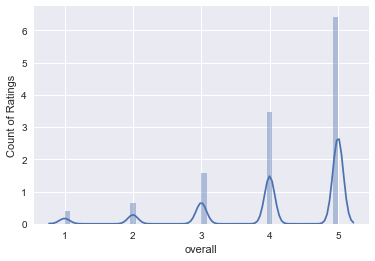


Ratings - K nearest neighor model with 32 neighors
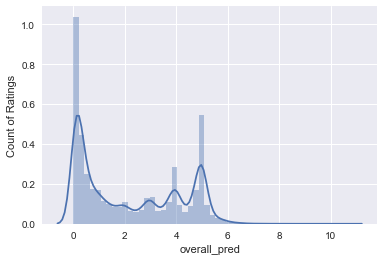

Ratings - NMF Model with 300 Latent features  

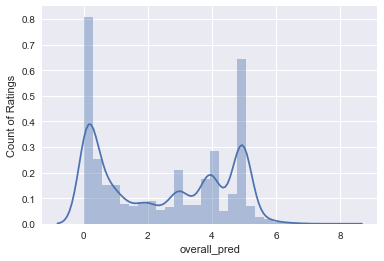



### Reflection
The Udacity ML Nanodegree Capstone Project has been a challenging yet enriching experience. Each section has been challenging in its way but implementation section has been the most challenging for me. Handling 82 milion dataset and reducing it down to a reasonable number with multiple rating for each items and keeping in mind the limitation of my PC

Coming to recommender system model, I had no experience within Udacity Curriculum. I have spend more than 20 hours trying to understand the possible options I have available for building the recommender engine. I started the project with Collaborative filtering in mind becuase the idea of recommending a product without knowing anything about a product intrigued me. It reminds of the idea of collective intelligence. I believe this is the only way one can truely recommend products important n so many speheres of our life. It emphasizes the similarity in likes and dislikes of the fellow mankind.

I then leanred more on choosing item based, user based filtering or an hybrid aprroach. After understanding the popularity and benefits of item-based filtering, given the limited machine power available to me, and ofcourse being timebound I decided to implement item-based as the first step.

The most challenging factor is to decide on the final K neighors in Knn and optimum p Latent Features. I ran multiple runs of the iteration to come up with the final values.

Overall, it has been a great learning experience, althought I am still overwhelmed with all the algorithms and techniques that are available for recommender system. I intend to carry on refining the approach until I am fully content with the final hybrid recommender system.


### Improvement

There are several ways the model can be improved, given more time and more powerful Server:

1. Value of k in k neighors and p latent factors in NMF can be optimized by by implementing K fold cross validation. By splitting the dataset in K folds and then choosing random K-1 folds at a time, K RMSE scores can be generated for a specific k or p values. The k/p value with the lowest average RMSE score can then be marked as optimized and used in the final dataset.

2. A few other We can also try a few other matrix factorization algorithm such as SVD and bench mark the performance as well.

3. Along with this, I can refine the recommendation by implementing session based recommendation using recurrent neural network. We have time stamp for each review and the order of product review can help us recommend products that will be of immediate interest to the user.